## Loading the Data
Unpickling the bAbI Data Set from Meta Research


In [ ]:
import pickle
import numpy as np

In [ ]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [ ]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

## Exploring the Format of the Data

The data is in the form - 


*   Story -> A sequence of simple descriptive sentences.
*   Question -> A single question related to the above story.
*   Answer -> 'Yes' or 'No'

In [ ]:
print('Train data type and size : ', type(train_data),len(train_data))
print('Test data type and size : ', type(test_data),len(test_data))

Train data type and size :  <class 'list'> 10000
Test data type and size :  <class 'list'> 1000


In [ ]:
' '.join(train_data[9][0])

'Sandra got the football there . Mary went to the bedroom . Daniel got the apple there . Sandra travelled to the hallway . Sandra moved to the garden . Mary travelled to the kitchen . Sandra went back to the bedroom . Daniel put down the apple . Sandra put down the football . Sandra journeyed to the office .'

In [ ]:
' '.join(train_data[9][1])

'Is Mary in the kitchen ?'

In [ ]:
train_data[9][2]

'yes'

## Setting up Vocabulary of All Words

In [ ]:
vocab = set()

In [ ]:
all_data = test_data + train_data

In [ ]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
textfile = open("vocab.txt", "w")
for element in vocab:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [ ]:
max_story_len = max([len(data[0]) for data in all_data])

In [ ]:
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

## Vectorizing the Data


*   Padding
*   Tokenization



In [ ]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'.': 11,
 '?': 15,
 'apple': 19,
 'back': 37,
 'bathroom': 3,
 'bedroom': 22,
 'daniel': 13,
 'discarded': 25,
 'down': 12,
 'dropped': 9,
 'football': 21,
 'garden': 31,
 'got': 34,
 'grabbed': 4,
 'hallway': 5,
 'in': 14,
 'is': 35,
 'john': 33,
 'journeyed': 32,
 'kitchen': 30,
 'left': 10,
 'mary': 29,
 'milk': 23,
 'moved': 6,
 'no': 27,
 'office': 2,
 'picked': 1,
 'put': 8,
 'sandra': 16,
 'the': 26,
 'there': 17,
 'to': 36,
 'took': 18,
 'travelled': 24,
 'up': 7,
 'went': 28,
 'yes': 20}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_story_seq)

10000

In [ ]:
word_index = tokenizer.word_index

### Complete Function for Vectorization

We first loop for every story, query , and answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    

Input : 

*   data: consisting of Stories,Questions,and Answers
*   word_index: word index dictionary from tokenizer
*   max_story_len: the length of the longest story (used for pad_sequences function)
*   max_question_len: length of the longest question (used for pad_sequences function)


Output:
    
stories,questions, and answers vectorized into padded sequences.

In [ ]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):

    X = [] # STORIES
    Xq = [] # QUESTION
    Y = []  # ANSWER
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 26, 22, 11],
       [ 0,  0,  0, ..., 26, 31, 11],
       [ 0,  0,  0, ..., 26, 31, 11],
       ...,
       [ 0,  0,  0, ..., 26, 19, 11],
       [ 0,  0,  0, ..., 26, 31, 11],
       [ 0,  0,  0, ..., 19, 17, 11]], dtype=int32)

In [ ]:
queries_test

array([[35, 33, 14, 26, 30, 15],
       [35, 33, 14, 26, 30, 15],
       [35, 33, 14, 26, 31, 15],
       ...,
       [35, 29, 14, 26, 22, 15],
       [35, 16, 14, 26, 31, 15],
       [35, 29, 14, 26, 31, 15]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [ ]:
tokenizer.word_index['yes']

20

In [ ]:
tokenizer.word_index['no']

27

# **Creating the Model**
## Building the Neural Network


*   Input Encoder M
*   Input Encoder C
*   Question Encoder







In [ ]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs
We have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

## Encoders

### Input Encoder m
This encoder will output:
(samples, story_maxlen, embedding_dim)

The Drop-off layer turns off a percentage of randomly selected Neurons to avoid overfitting

In [ ]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

### Input Encoder c

In [ ]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

To embed the question into a sequence of vectors

In [ ]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

### Encode the Sequences

Encoded ----> Encoder(Input)


Basically encodes input sequence and questions (which are indices) to sequences of dense vectors

In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [ ]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [ ]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [ ]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [ ]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [ ]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [ ]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [ ]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 8s 16ms/step - loss: 0.8916 - accuracy: 0.5020 - val_loss: 0.6960 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 14ms/step - loss: 0.7021 - accuracy: 0.4944 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6957 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6943 - accuracy: 0.5055 - val_loss: 0.6964 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6949 - accuracy: 0.4948 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6944 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4880
Epoch 7/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6942 - accuracy: 0.5058 - val_loss: 0.6936 - val_accuracy:

### Saving the Model

In [ ]:
filename = 'ChatBot_Model.h5'
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Evaluating the Model

### Training Accuracy plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


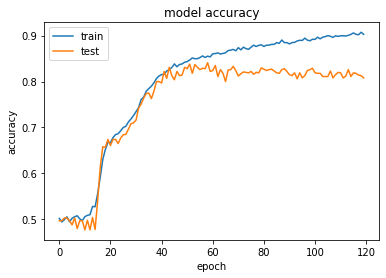

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [ ]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999999


## Testing with our own Stories and Questions

Picking out words from the existing vocabulary - 

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [ ]:
my_question = "Is the football in the garden ?"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([ my_story, my_ques]))

In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.97079676
